# CSE204: Lab exam session, 03/13/2019

@author: Theo Lacombe

Please read the following carefully before starting the exam.

## Overall presentation

This lab exam is composed of 3 exercises, each of them granting up to 7 points (the final grade is over 20, so there is one bonus point). 

These exercises are independant.

## Rules and other remarks

Obviously, standard exam rules hold for this lab session, that is no chatting, no use of communication tools, no use of smartphone, etc.

As this is a exam on computer, some details must be specified:
- You are allowed to call the responsible for **technical** (i.e. Python related) help in order to understand an error message if needed (that does not mean that we will debug your code).
- Your answers to written questions (like "What do you observe?") must be **short**, basically one sentence at most (most of the time, a single word would fit perfectly).
- You are allowed to use all standard Python tools along with the `numpy` library. However, you are **not** allowed to use `scikit-learn` except when it is explicitely mentionned in the question. (Basically, it means that if the question is "implement a linear regression", you can't just import the one of `scikit-learn`.)
- <!-- add rules about documents -->
- You won't be evaluated on the quality of your code, only on its correctness.
- You must not change the name of the functions pre-written.
- Beware of the cells you run (and the order you run them): don't run train the algorithm of exercise 3 on the data of exercise 2 by mistake!

## Imports

In [1]:
%matplotlib inline
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# a side file that contains some useful test function & cie.
from utils import *

# Exercise 1 : $k$-nearest neighbors classifier

We briefly recall the $k$ nearest neighbors ($k$-NN) algorithm seen in lab session 2, which is a classification method.

Consider a dataset $\mathcal{D} = (X, y)$ where the $k$-th coordinate of the $i$-th observation is denoted by $x^{(i)}_k$ and the corresponding label is $y^{(i)}$, or equilvalently:
$$\boldsymbol{X} = \begin{pmatrix} x_1^{(1)} & \dots & x_p^{(1)} \\ \vdots & \dots & \vdots \\ x_1^{(n)} & \dots & x_p^{(n)} \end{pmatrix}
\quad \quad
\boldsymbol{y} = \begin{pmatrix} y^{(1)} \\ \vdots \\ y^{(n)} \end{pmatrix}.$$

Fix an integer $k$. Given a new observation $x \in \mathbb{R}^p$, we produce an estimation of its class $\hat{y}$ in the following way:

Let $x^{(i_1)}, \dots, x^{(i_k)}$ be the $k$ points in $X$ that minimizes $\|x - x^{(i)}\|_2$. Then $\hat{y}$ is the predominent occurence in $\{ y^{(i_1)}, \dots, y^{(i_k)} \}$. In case of equality between two (or more) classes, $\hat{y}$ is randomly chosen (uniformly) among these classes. 

**Question 1:** What is the training error achieved by this algorithm in the case $k=1$?

<-- write your answer here -->

**Question 2:** Is the $k$-NN algorithm a _parametric_ or _non-parametric_ model?

<-- write your answer here -->

**Question 3:** Implement a function `oneNN` that takes as an input a matrix `X_train` of shape `n x p`, corresponding labels `y_train` (shape `n`) a new observation `x` of shape `p`, and that returns an estimation of `hat_y` for this new observation using the **one**-nearest neighbor algorithm.

_Python hint:_ You can compute the distance between two numpy arrays `x_i` and `x` using `np.linalg.norm(x_i, x)`.

In [ ]:
def oneNN(X_train, y_train, x):
    """
        param X_train: np.array, shape N x p
        param y_train: np.array, shape N
        param x:       np.array, shape p
        return: hat_y, class prediction.
    """
    return None #<-- to complete

Test your function by running the following cell

In [ ]:
test_oneNN(oneNN)

We consider a dataset of $n = 500$ points, with $3$ labels "red", "blue", and "green", encoded respectively by $0,1,2$ in the following. This dataset is splitted in a training set `x_train, y_train` with $400$ observations, and a test set `x_test, y_test` of $100$ data ; this dataset must be loaded by running the following cell.

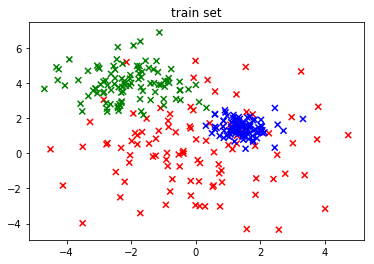

In [19]:
x_train, y_train, x_test, y_test = load_kNN_dataset()

**Question 4:** In this question, we allow the use of the `scikit-learn` library. 

**4.a.** Using it, perform $k$-NN classification for all $k = 1 \dots 10$ by training on (`x_train`, `y_train`), and use it to predict labels for `x_test`. Evaluate the quality of the classification using the `accuracy_score` function provided by `scikit-learn`.


We recall the use of `scikit-learn` to perform $k$-NN classification:
- `clf = KNeighborsClassifier(n_neighbors = k)` creates an object of the class `classifier` that can be used to perform `n_neighbors`-NN classification (of course, you have to precise the value of `k` when instanciating the classifier).
- `clf.fit(x_train,y_train)` trains this classifier on a training set (`x_train` is the observation matrix, `y_train` the labels).
- `clf.predict(x_test)` returns label estimations for a new set of observations encoded as a matrix `x_test`.
- Given `y_true` and `y_pred` which are respectively the true labels of the test set (`y_test` here) and the label predicted by the $k$-NN classifier, you can compute the accuracy score of the classification using `accuracy_score(y_true, y_pred)`.

In [25]:
best_acc = 0
top_k = 0

for k in np.arange(1,20):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    # print("for k =", k, "reaches accuracy:", np.round(100 * accuracy_score(y_pred, y_test), 5))
    test_acc = np.round(100 * accuracy_score(y_pred, y_test), 5)
    if test_acc > best_acc:
        best_acc = test_acc
        top_k = k
print("best k value is:", top_k)

for k = 1 reaches accuracy: 85.0
for k = 2 reaches accuracy: 84.25
for k = 3 reaches accuracy: 87.75
for k = 4 reaches accuracy: 87.75
for k = 5 reaches accuracy: 88.0
for k = 6 reaches accuracy: 87.75
for k = 7 reaches accuracy: 85.25
for k = 8 reaches accuracy: 86.75
for k = 9 reaches accuracy: 84.75
for k = 10 reaches accuracy: 85.75
for k = 11 reaches accuracy: 83.5
for k = 12 reaches accuracy: 84.75
for k = 13 reaches accuracy: 83.75
for k = 14 reaches accuracy: 84.0
for k = 15 reaches accuracy: 83.0
for k = 16 reaches accuracy: 82.75
for k = 17 reaches accuracy: 82.75
for k = 18 reaches accuracy: 82.5
for k = 19 reaches accuracy: 82.0
best k value is: 5


**4.b.** Which value of $k$ reaches the best accuracy on the test set?

<-- write your answer here-->

# Exercise 2 : Linear regression and its extensions

We briefly recall the framework of linear regression.

Consider observations $x = x^{(1)} \dots x^{(n)}$, with $x^{(i)} \in \mathbb{R}^p$, and labels $y^{(1)} \dots y^{(n)}$.
Given an observation $x^{(i)}$, and a vector $\theta = (\theta_0 \dots \theta_p)^T$, we produce an estimation $\hat{y}^{(i)}$ of $y^{(i)}$ of the following form:
$$ \hat{y}^{(i)} = \theta_0 + \theta_1 x^{(i)}_1 + \dots + \theta_p x^{(i)}_p.$$
We want to find an optimal vector $\theta^*$ so that the average error made by using $\hat{y}^{(i)}$ to approximate $y^{(i)}$ is small.
With vector notations, it reads:
$$\theta^* \in \mathrm{argmin} (E(\theta)), \quad \text{ where } \quad E(\theta) := \frac{1}{n} \| y - X \cdot \theta\|_2, $$
where 
$$
\boldsymbol{X} = \begin{pmatrix} 1 & x_1^{(1)} & \dots & x_p^{(1)} \\ \vdots & \vdots & \dots & \vdots \\ 1 & x_1^{(n)} & \dots & x_p^{(n)} \end{pmatrix}
\quad \quad
\boldsymbol{y} = \begin{pmatrix} y^{(1)} \\ \vdots \\ y^{(n)} \end{pmatrix}.
$$
We recall that a solution in closed form exists, namely the optimal $\theta^*$ is given by:
$$ \theta^* = (X^T X)^{-1} X^T y$$

## Vanilla linear regression

**Question 1:** Implement a function `linreg` that, given `X` and `y`, returns the vector optimal `theta`.

_Python hints_ : 
- You can use `np.linalg.inv(A)` to compute the inverse of a (non-singular) **square** matrix. 
- You can use `np.transpose(A)` or equivalently `A.T` to compute the transpose of a numpy array `A`. 
- You can use `np.dot(A,B)`, or equivalently `A.dot(B)` to compute the matrix-matrix (or matrix-vector) $A \cdot B$ product between two numpy arrays `A` and `B`. Beware of the shapes!

In [3]:
def linreg(X,y):
    """
        param X: np.array of shape N x (p+1)
        param y: np.array of shape N
        return:  np.array of shape (p+1)
    """
    XtX = np.linalg.inv(np.dot(X.T, X))
    XtY = np.dot(X.T, y)
    return np.dot(XtX, XtY)

**Question 2:** Implement a function `E` that, given `X,y,theta` computes the error $E(\theta)$.

_Python hint:_ You can compute the distance between two vector `hat_y` and `y` using `np.linalg.norm(hat_y - y)`.

In [11]:
def E(X,y,theta):
    """
        param X:     np.array of shape N x (p+1)
        param y:     np.array of shape N
        param theta: np.array of shape (p+1)
        return: float, evaluation of the error function.
    """
    n = len(y)
    hat_y = np.dot(X, theta)
    return 1 / n * np.linalg.norm(hat_y - y)

**Question 3:** Implement a function `pred` that, given an observation `x` of shape `p` and a vector `theta`, returns a predicted value `hat_y`.

_Hint:_ Do not forget the constant term $\theta_0$.

In [5]:
def pred(x,theta):
    """
        param x:     np.array of shape p
        param theta: np.array of shape (p+1)
    """
    return np.dot(X, theta)

Test your functions with the following script.

In [ ]:
test_linear_regression(linreg, pred)

## Polynomial regression

We consider the specific case where the observations $x^{(i)}$ are real-valued (that is $p=1$). For an integer $k$ fixed, and a vector $\theta = (\theta_0 \dots \theta_k)^T$, we propose to estimate $y^{(i)}$ in the following way:
$$ \hat{y}^{(i)} = \theta_0 + \theta_1 x^{(i)} + \theta_2 (x^{(i)})^2 + \dots + \theta_k (x^{(i)})^k. $$
Here, $(x^{(i)})^j$ means the $j$-th power of $x^{(i)}$.

As in standard linear regression, the goal is to find a $\theta^*$ so that 
$$ \sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2 $$
is minimal.

**Question 4:** Write a function `polynomial_expend` that, given a **real valued** vector $x \in \mathbb{R}^n$ and an integer $k$, returns the $n \times (k+1)$ matrix
$$X = \begin{pmatrix} 1 & x^{(1)} & \dots & (x^{(1)})^k \\ \vdots & \vdots & \dots & \vdots \\ 1 & x^{(n)} & \dots & (x^{(n)})^k \end{pmatrix}$$

In [6]:
def polynomial_expend(x,k):
    """
        param x: np.array of shape N
        param k: integer
        return:  np.array of shape N x (p+1)
    """
    X = np.array([[xi**p for p in range(k)] for xi in x])
    return X

We consider a dataset of $n = 50$ couple of (observations, labels), that is splitted into a _train set_ of size $40$ and a _test set_ of size $10$. These data are loaded using the following cell.

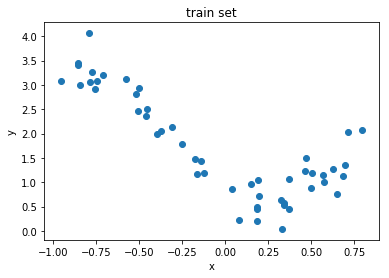

In [23]:
x_train, y_train, x_test, y_test = load_data_polyreg()

**Question 5:** Using the functions that you have written above, 

**5.a.** Perform a polynomial regression to fit `x_train, y_train` ; with $k = 1 \dots 15$ and then predict labels for for the test set `x_test`. 

The test error is defined as
$$ E_\mathrm{test} (\hat{y}, y_\mathrm{test}) = \frac{1}{n_\mathrm{test}} \|\hat{y} - y_\mathrm{test}\|, $$
where $n_\mathrm{test}$ is the number of observation in the test set.

Store training errors and test errors you obtain as two `np.array`s of size $10$, whose names must be (respectively) `train_errors` and `test_errors`, and such that `train_errors[k]` (resp. `test_errors[k]`) gives the training error (resp. test error) obtained by performing polynomial regression with maximal degree $k$.

_Python hint:_ Recall that you can compute the distance between two numpy array using `np.linalg.norm(hat_y, y_test)`.

In [26]:
kmax = 12
train_errors = np.zeros(kmax)
test_errors = np.zeros(kmax)

for k in range(kmax):
    X_train = polynomial_expend(x_train, k)
    X_test = polynomial_expend(x_test, k)
    theta = linreg(X_train, y_train)
    
    train_errors[k] = E(X_train, y_train, theta)
    test_errors[k] = E(X_test, y_test, theta)

Run the following cell (beware of variable names!)

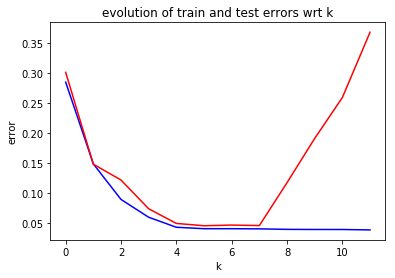

In [27]:
plot_linreg_errors(train_errors, test_errors)

**5.b.** What is the name of the phenomenon we are observing here? (short answer)

<-- write something here -->

# Exercice 3 : the logistic regression

The logistic regression is a common model used to perform binary classification that is however formulated as a regression problem. 

We have a *learning set* $\mathcal{D} = \{\boldsymbol{x^{(i)}}, y^{(i)}\}_{1 \leq i \leq n}$, where $y_i \in \{0,1\}$ and $x_i \in \mathbb{R}^p$.

We consider the logistic function:
$$ \sigma : t \mapsto \frac{1}{1 + e^{-t}}.$$
Note that $\sigma$ takes values in $(0,1)$ and will be used to estimate $y^{(i)}$ given $x^{(i)}$. More precisely, given a weight vector $\theta = ( \theta_0 \dots \theta_p )^T$ and a vector $X^{(i)} = (1, x^{(i)}_1 \dots x^{(i)}_p)$, we make the following estimation:
$$
    \hat{y}^{(i)} = \begin{cases} 1 \text{ if } \sigma(X^{(i)} \theta) > 1/2 \\
                                  0 \text{ otherwise } 
                    \end{cases}
$$

We want to find a good $\theta$. One can show that the optimal $\boldsymbol{\theta}^* = \begin{pmatrix} \theta_0^* & \dots & \theta_p^* \end{pmatrix}^T$ minimizes the following optimization problem:

$$\boldsymbol{\theta}^* \leftarrow \arg\min_{\boldsymbol{\theta}} E(\boldsymbol{\theta}) \quad \text{with} \quad E(\boldsymbol{\theta}) = \sum_{i=1}^n \log ( 1 + \exp( - y^{(i)} X^{(i)} \cdot \theta ) )$$
with

$$
\boldsymbol{X} = \begin{pmatrix} 1 & x_1^{(1)} & \dots & x_p^{(1)} \\ \vdots & \vdots & \dots & \vdots \\ 1 & x_1^{(n)} & \dots & x_p^{(n)} \end{pmatrix}
\quad \quad
\boldsymbol{y} = \begin{pmatrix} y^{(1)} \\ \vdots \\ y^{(n)} \end{pmatrix}
\quad \quad
\boldsymbol{\theta} = \begin{pmatrix} \theta_0 \\ \vdots \\ \theta_p \end{pmatrix}
$$

**Question 1** : Does the error function $E$ have a unique minimum?

<-- answer here -->

**Question 2:** 

**2.a.** Implement a function `sigma` that compute, given $x^{(i)} \in \mathbb{R}^p$ and $\theta \in \mathbb{R}^{p+1}$ the quantity $\sigma(X^{(i)} \cdot \theta)$.

In [2]:
def sigma(x, theta):
    """
        param x:     np.array of shape p
        param theta: np.array of shape (p+1)
        return: float.
    """
    return 1 / (1 + np.exp(- theta[0] - np.dot(x, theta[1:])))

**2.b.** Implement a function `pred` that provides, given $x^{(i)} \in \mathbb{R}^p$ and $\theta \in \mathbb{R}^{p+1}$, an estimate $\hat{y}^{(i)}$ of $y^{(i)}$.

_Python hint:_ `theta[1:]` returns the vector $(\theta_1 \dots \theta_p)$.

In [3]:
def pred(x, theta):
    """
        param x:     np.array of shape p
        param theta: np.array of shape p+1
        return: integer, 0 or 1.
    """
    s = sigma(x, theta)
    if s > 0.5:
        return 1
    else:
        return 0

**Question 3:** Implement the error function we want to minimize $E$, that takes $X, y, \theta$ as arguments.

In [4]:
def E(x, y, theta):
    """
        param x:     np.array of shape N x (p+1)
        param y:     np.array of shape N
        param theta: np.array of shape (p+1)
        return: float
    """
    n = len(y)
    # return np.sum([np.log(1 + np.exp ( - y[i] * ( theta[0] + np.dot(x[i], theta[1:]) ) ) ) for i in range(n)])
    h = sigma(x, theta)
    return - np.sum(np.log(h) * y + np.log(1 - h) * (1 - y)) / n

As there is no closed form for the optimal $\theta^*$, we will minimize $E$ using a gradient descent. Implement a function `grad_E(X,y,theta)` that returns the gradient (with respect to $\theta$) of $E$ for the current estimation $\theta$ of $E$.

You can test your implementation with following cell.

_Hint:_ If you don't remember the expression of the gradient for this problem seen in lectures 4 and 5, you can derive it on a separate sheet of paper.

In [5]:
def grad_E(x, y, theta):
    """
        param x:     np.array of shape N x p
        param y:     np.array of shape N
        param theta: np.array of shape (p+1)
        return: np.array of shape (p+1)
    """
    n, p = x.shape
    g = np.zeros(p+1)
    s = np.array([pred(xi, theta) for xi in x])
    g[0] = np.sum(s - y)
    g[1:] = np.dot(s - y, x)
    return g / n

In [ ]:
test_grad(grad_E)

**Question 4:** Complete the following code in order to implement the gradient descent algorithm to minimize $E$ that returns the final estimation of $\theta$ and the evolution of energy over time. The hyper parameters (number of steps, learning rates) are set by default and should not be changed.

Note also that we supposed we are only given $x$, not $X$ so you should reconstruct it. 

In [8]:
def grad_descent(x, y, eta=0.1, nb_max_step=100, stopping_criterion=0.0001):
    """
        param x:                  np.array, input observations, shape N x p
        param y:                  np.array, input labels, shape N (filled with 0 and 1)
        param eta:                float, learning rate.
        param nb_max_step:        int, maximal number of steps done in the gradient descent.
        param stopping_criterion: float, stopping criterion on gradient process.
        
        return: np.array of shape (p+1) (theta), list of float (evolution_of_loss)
        
        Remark: do not change the default values!
    """
    # Storing some useful values
    n, p = x.shape
    # List to store the evolution of E(theta) over steps
    evolution_of_loss = []
    # Store the current value of loss to stop gradient descent
    e = np.inf
    # Initialization of theta
    np.random.seed(seed=42)  # DO NOT change this
    theta = np.random.rand(p+1)
  
    ### Perform the gradient descent
    for t in range(nb_max_step):
        
        # Perform a gradient step
        g = grad_E(x, y, theta)
        theta = theta - eta * g
        new_e = E(x, y, theta) #<-- to complete, store the loss according to the new parameter theta
        #if ((t+1)%10)==0:
        print(new_e)
        # We stop the gradient descent if the loss function increases (means our learning rate is too big)
        if new_e > e:
            break
        # We stop the gradient descent if the variation in the loss function is small
        elif np.abs(new_e - e) < stopping_criterion:
            break  # break allow to exit the for loop
        # otherwise, we just set e = new_e and store it
        else:
            e = new_e
            evolution_of_loss.append(e)
    
    return theta, evolution_of_loss

## Test on a 1D dataset

**Question 5:** test your code with the cell below.

0.3164935822284471
0.314794933731454
0.3133011590104235
0.3118285634948192
0.3107204379449754
0.30962678581868386
0.30854762050162865
0.30748295507548207
0.3064328023177483
0.30539717470163535
0.3043760843959547
0.3035178364262793
0.30267135375492615
0.3019796781773745
0.30129733255026053
0.3006243306389962
0.29996068612719257
0.29930641261634716
0.29866152362553505
0.2980260325911043
0.29739995286637594
0.296783297721348
0.2961760803424033
0.29557831383202215
0.2951059640324807
0.29475443934893836
0.29452015132326836
0.29428979711927794
0.2940633854477345
0.2938409250342772
0.29362242461944793
0.2934078929587223
0.29319733882254156
0.2929907709963442
0.29278819828059893
0.2925896294908371
0.2923950734576865
0.29220453902690474
0.2920180350594136
0.29183557043133407
0.2916571540340209
0.29148279477409866
0.29131250157349814
0.29123063867551
0.29115154134240107
0.29107521617817933
0.2910016698048513
0.2909309088624959
0.2908629400093382
0.29079776992182554
0.2907354052947018
0.290675852

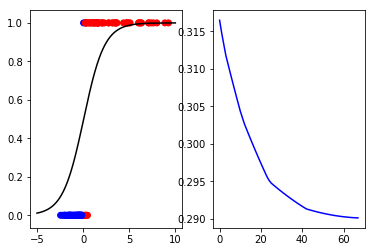

In [9]:
test_1d_logreg(grad_descent, pred,sigma)

## On a 2D dataset

We consider a dataset composed of a training set `(x_train,y_train)` with $N = 280$ points and a test set `x_test` of $N' = 20$ points (along with some unknown labels `y_test`) that you can load using the following cell. The score of a classifier is defined as
$$ \frac{1}{N'} \sum_{i=1}^{N'} \delta_{\mathrm{pred}(x_\mathrm{test}^{(i)}), y_\mathrm{test}^{(i)}} $$
where
$$\delta_{\alpha,\beta} = \begin{cases} 1 \text{ if } \alpha = \beta \\ 0 \text{ otherwise } \end{cases}$$

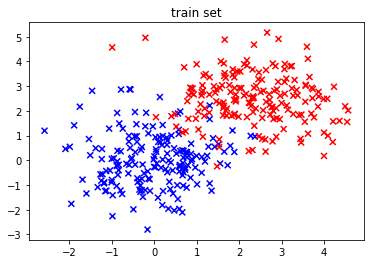

In [54]:
x_train, y_train, x_test, y_test = load_2D_set()

**Question 6:** 

**6.a.** What is the training error of the logistic regression on this dataset?

In [86]:
theta = grad_descent(x_train, y_train)

0.5224546068641367
0.5128163307847964
0.5033612863295538
0.4940986432614586
0.4851005878772264
0.47631431090458665
0.4677509323636445
0.45961980411421616
0.4519246569102228
0.44454180381292424
0.43741417024882584
0.4305560422967349
0.42410380630416133
0.418185040946271
0.41274624635207574
0.4076759886318325
0.40303850030650856
0.3988375954444709
0.39512416014670193
0.39180244900245575
0.388891086164139
0.38640049629377676
0.3844639822795666
0.3829868890147328
0.3819436702278707
0.38143547796696636
0.38136856184174717


Write the answer of the question in the cell below.

<-- here -->

**6.b.** What is your test error?

In [ ]:
# Write some code here to answer the question

Write the answer of the question in the cell below.

<-- here -->